In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.filters import frangi

In [58]:
def main(eye_name):
    print("Start processing")
    eye_image = cv2.imread("healthy/" + eye_name + ".jpg")
    eye_image = cv2.filter2D(eye_image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
    eye_image = cv2.cvtColor(eye_image, cv2.COLOR_BGR2RGB)
    eye_image_grey = cv2.cvtColor(eye_image, cv2.COLOR_RGB2GRAY)
    
    plt.title("Input image")
    plt.imshow(eye_image)
    plt.show()
    
    plt.title("Grey image - intermediate step")
    plt.imshow(eye_image_grey, cmap="gray")
    plt.show()
    
    width, height = np.shape(eye_image_grey)
    print(f"Check line: width : {width}, height : {height}")
    
    eye_image_grey_tmp = frangi(eye_image_grey)
    plt.title("Grey image after frangi - intermediate step")
    plt.imshow(eye_image_grey_tmp, cmap="gray")
    plt.show()
    
    
    final = elemnt(eye_image_grey_tmp, eye_image_grey)
    
    plt.title("Output image")
    plt.imshow(final, cmap="gray")
    plt.show()
    
def testFunction(image_name, image_mask):
    print("Start processing")
    image = cv2.imread(image_name)
    image = cv2.filter2D(image, -1, np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_grey = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    plt.title("Input image")
    plt.imshow(image)
    plt.show()
    
    mask = cv2.imread(image_mask)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    
    plt.title("Mask image")
    plt.imshow(mask)
    plt.show()
    
    elemnt(image_grey, mask)
    
def elemnt(frangi_image, image):
    width, height = np.shape(frangi_image)
    print(f"Check line in elemnt function: width : {width}, height : {height}")
    
    frangi_image_array = np.array(frangi_image)
#     print(frangi_image_array)
    
    image_array = np.array(image)
#     print(image_array)
    
    frangi_image_array_result = np.where(frangi_image_array <= 0.0000002, 0, 255 - frangi_image_array)
#     print(frangi_image_array_result)
    
    print("Check line: result array")
    array_result = np.where(image_array  < 20, 0, frangi_image_array_result)
#     print(array_result)
    
    return array_result

Start processing


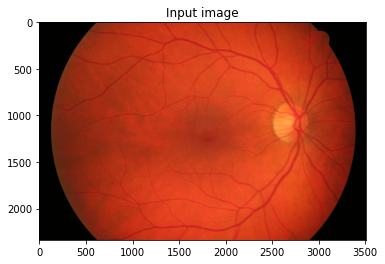

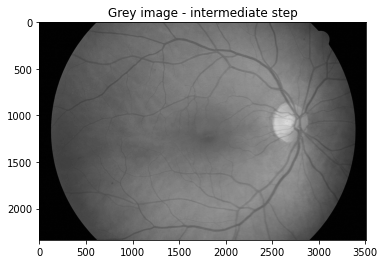

Check line: width : 2336, height : 3504


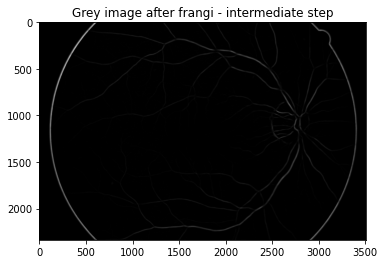

Check line in elemnt function: width : 2336, height : 3504
Check line: result array


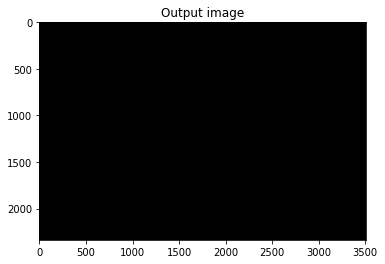

In [59]:
main("05_h")

Start processing


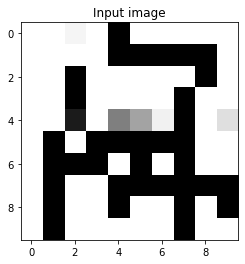

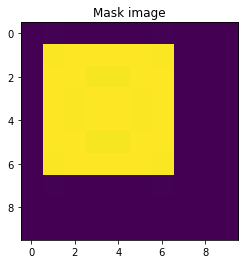

Check line in elemnt function: width : 10, height : 10
[[255 255 245 255   0 255 255 255 255 255]
 [255 255 255 255   0   0   0   0   0 255]
 [255 255   0 255 255 255 255 255   0 255]
 [255 255   0 255 255 255 255   0 255 255]
 [255 255  27 255 127 163 241   0 255 223]
 [255   0 255   0   0   0   0   0 255 255]
 [255   0   0   0 255   0 255   0 255 255]
 [255   0 255 255   0   0   0   0   0   0]
 [255   0 255 255   0 255 255   0 255   0]
 [255   0 255 255 255 255 255   0 255 255]]
[[  0   1   0   0   0   0   1   0   0   0]
 [  0 254 255 255 255 255 254   0   0   0]
 [  0 255 255 252 252 255 255   0   0   0]
 [  0 255 254 255 255 254 255   0   0   0]
 [  0 255 254 255 255 254 255   0   0   0]
 [  0 255 255 252 252 255 255   0   0   0]
 [  0 254 255 255 255 255 254   0   0   0]
 [  0   1   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]
[[  0   0  10   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   

In [57]:
testFunction("testImage/test.jpg", "testImage/mask.jpg")